In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df = pd.read_csv(r"..\input\train.csv")
test_df = pd.read_csv(r"..\input\test.csv")

test_df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
#Get the dummy variables for all features.
# 1 : Numerical : Fill with the mean values
# 2:  Categorical : 1) Replace NA with None, as NA has some meaning. 
#                      Like NA for parking will mean No parking and may effect SaleCost
#Rest all delete the rows

def clean_data(df):
    df['MasVnrType'].fillna("NoNe",inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
    df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(),inplace=True)
    df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(),inplace=True)
    df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(),inplace=True)
    df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean(),inplace=True)
    df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean(),inplace=True)
    df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
    df['Alley'].fillna("NoNe",inplace=True)
    df['FireplaceQu'].fillna("NoNe",inplace=True)
    df['GarageType'].fillna("NoNe",inplace=True)
    df['GarageYrBlt'].fillna("NoNe",inplace=True)
    df['GarageFinish'].fillna("NoNe",inplace=True)
    df['GarageQual'].fillna("NoNe",inplace=True)
    df['GarageCond'].fillna("NoNe",inplace=True)
    df['PoolQC'].fillna("NoNe",inplace=True)
    df['Fence'].fillna("NoNe",inplace=True)
    df['MiscFeature'].fillna("NoNe",inplace=True)
    df['GarageCars'].fillna(df['GarageCars'].mean(),inplace=True)
    df['GarageArea'].fillna(df['GarageArea'].mean(),inplace=True)
    #For rest of he variables we will drop the data
    #df.dropna(axis=0,inplace=True)
    return df
def clean_data_test(df):
    df['MasVnrType'].fillna("NoNe",inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)
    df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(),inplace=True)
    df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(),inplace=True)
    df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(),inplace=True)
    df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean(),inplace=True)
    df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean(),inplace=True)
    df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
    df['Alley'].fillna("NoNe",inplace=True)
    df['FireplaceQu'].fillna("NoNe",inplace=True)
    df['GarageType'].fillna("NoNe",inplace=True)
    df['GarageYrBlt'].fillna("NoNe",inplace=True)
    df['GarageFinish'].fillna("NoNe",inplace=True)
    df['GarageQual'].fillna("NoNe",inplace=True)
    df['GarageCond'].fillna("NoNe",inplace=True)
    df['PoolQC'].fillna("NoNe",inplace=True)
    df['Fence'].fillna("NoNe",inplace=True)
    df['MiscFeature'].fillna("NoNe",inplace=True)
    df['GarageCars'].fillna(df['GarageCars'].mean(),inplace=True)
    df['GarageArea'].fillna(df['GarageArea'].mean(),inplace=True)
    df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(),inplace=True)
    
    return df
    
def get_dummies(df):
    df = pd.get_dummies(df)
    return df

In [4]:
df = clean_data(df)
test_df = clean_data_test(test_df)
print(df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [5]:
#convert the categorical variable by adding dummies
df = get_dummies(df)
test_df = get_dummies(test_df)

#Test to see if both the test & train data and same columns
print(test_df.shape)

df['SalePrice'] = np.log(df['SalePrice'])

Y_train = df['SalePrice']
df.drop('SalePrice',axis=1,inplace=True)

print(df.shape)


(1459, 378)
(1460, 396)


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
def doMinMaxScaling(df):
    scalar = MinMaxScaler(feature_range = [0,1])
    data = scalar.fit_transform(df)
    return data

def doPCA(df,ncomponents=0):
    if ncomponents:
        pca = PCA(n_components=ncomponents)
        pcaData = pca.fit_transform(df)
        return pca,pcaData
    else:
        pca = PCA().fit(df)
        return pca
    
def getDataFromDf(df):
    return df.iloc[:,:]

In [7]:
train_data = getDataFromDf(df)


In [8]:
preProcData = doMinMaxScaling(train_data)


In [9]:
pca = doPCA(preProcData)

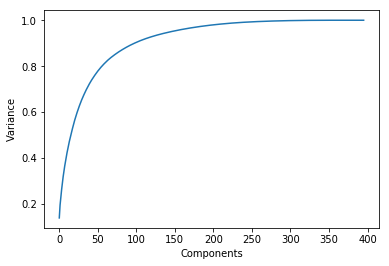

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel('Variance')
plt.show()


In [11]:
#Looks like 170 is the number we can take for the number of components


In [12]:
pca,trainPcaData = doPCA(preProcData,ncomponents=170)
params = pca.get_params()


In [13]:
trainPcaData_df = pd.DataFrame(trainPcaData)
trainPcaData_df.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,2.105940,0.475911,-0.511311,-1.345076,-0.547346,-0.134278,-0.631703,-0.369111,0.418643,-0.448304,...,0.014626,0.014364,-0.001778,-0.007508,0.018752,0.041500,0.031813,0.008972,0.008295,-0.023860
1,-0.292918,-0.945770,-0.117115,-0.420407,0.275591,-0.121424,0.350893,-0.393735,-0.470385,0.405297,...,-0.102298,0.000157,0.040102,0.001255,0.089769,0.064201,-0.123524,0.040402,0.044882,-0.034373
2,2.525644,-0.259819,-1.078696,-0.472536,0.232778,-0.033760,-0.036474,-0.346551,0.302158,-0.379319,...,0.009780,-0.021580,0.175040,0.044812,0.033103,0.114014,0.008712,-0.003336,0.055338,0.069208
3,-0.766172,0.439606,-0.918046,1.671792,0.513645,-0.755962,0.341853,0.347858,0.249921,0.348625,...,0.100449,-0.066767,0.060873,0.030996,-0.152897,-0.069460,0.057610,-0.094745,-0.066005,0.140514
4,2.609064,-0.400176,-1.237370,-0.209184,0.348209,0.039803,0.026895,0.001394,0.560424,-0.482780,...,0.013336,-0.005162,0.166764,0.090881,-0.019996,0.145719,-0.069582,-0.062106,0.053314,0.109863


In [15]:
X_train = trainPcaData_df

In [16]:
#Now Run the Ridge Regularization
from  sklearn.linear_model  import Ridge
def reg_alpha(X,Y,alpha,normalize=True):
    lreg = Ridge(alpha)
    model = lreg.fit(X,Y)
    Y_pred = model.predict(X)
    return model,Y_pred,lreg

def get_rmse(true_val,pred_val):
    error = true_val-pred_val
    rmse = np.sqrt(np.mean(error**2))
    return rmse

In [17]:
X = X_train
Y = Y_train

In [19]:
output = []
alpha = [100,10,1,0.1,0.01,0.001,0.0001]
count=0
for alpha_val in alpha:
    X = sm.add_constant(X)
    model,Y_pred_alpha,lreg = reg_alpha(X,Y,alpha_val)
    rmse = get_rmse(Y,Y_pred_alpha)
    score = model.score(X,Y)
    output.append((alpha_val,rmse,score))
    count+= 1
    X.drop('const',axis=1,inplace=True)

output_df = pd.DataFrame(output,columns=['alpha','rmse','score'])
output_df  


,alpha,rmse,score
0,100.0000,0.154507,0.850285
1,10.0000,0.124747,0.902405
2,1.0000,0.122030,0.906610
3,0.1000,0.121981,0.906685
4,0.0100,0.121980,0.906686
5,0.0010,0.121980,0.906686
6,0.0001,0.121980,0.906686


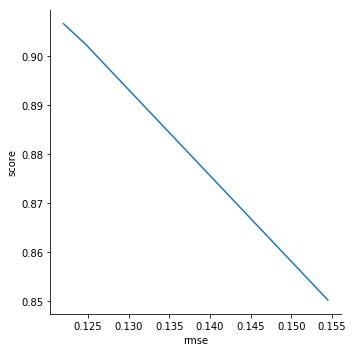

In [20]:
sn.relplot(x='rmse',y='score',kind="line",data=output_df)

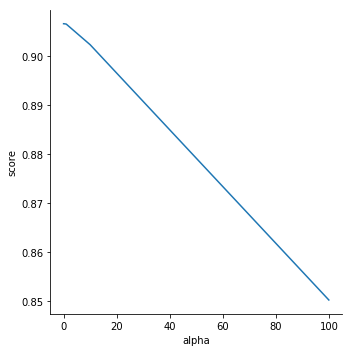

In [21]:
sn.relplot(x='alpha',y='score',kind="line",data=output_df)

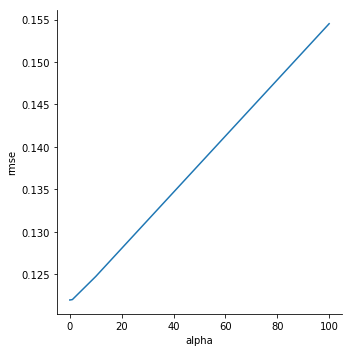

In [22]:
sn.relplot(x='alpha',y='rmse',kind="line",data=output_df)

In [24]:
#Let's keep alpha as 0.0100 as rest of the results are not realistic

alpha = 0.01
X = sm.add_constant(X)
model,Y_pred_alpha_train,lreg = reg_alpha(X,Y,alpha)

In [33]:
coefs = model.coef_.map(lambda x: x != 0 x else 0)
coefs

SyntaxError: invalid syntax (<ipython-input-33-42048ed79cfe>, line 1)

In [34]:
coefs_df = pd.Series(model.coef_,index=X.columns)

coefs_df = coefs_df.sort_values()
print(coefs_df.head())

43    -0.170802
101   -0.168218
167   -0.152998
95    -0.148500
55    -0.121542
dtype: float64


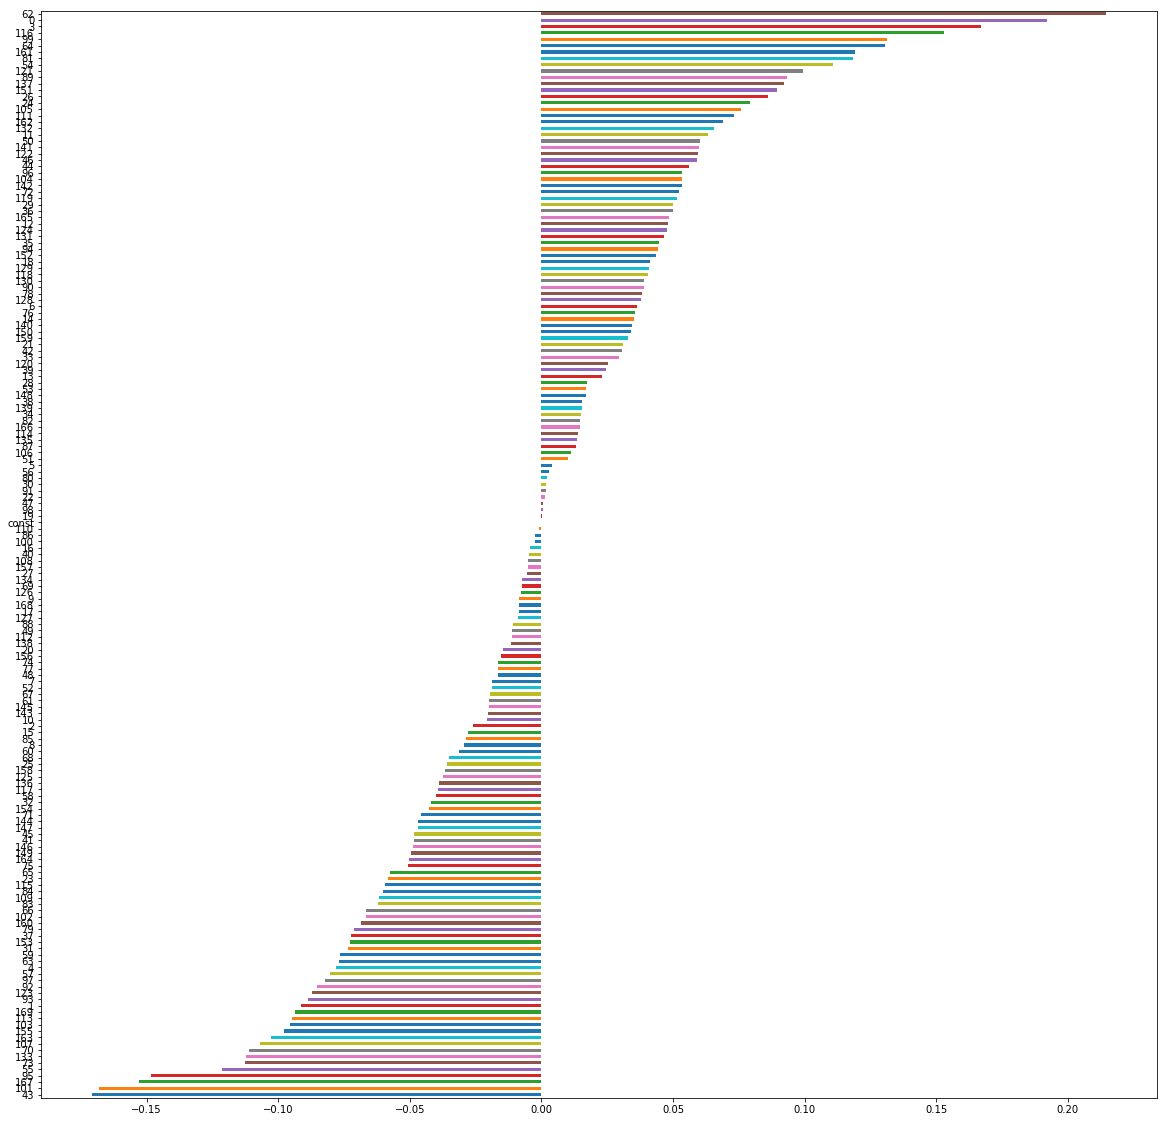

In [37]:
plt.figure(figsize=(20,20))
coefs_df.plot(kind='barh')

In [ ]:
#Prepare the test data
test_data = getDataFromDf(test_df)
testPreProcData = doMinMaxScaling(test_data)
pca,testPcaData = doPCA(testPreProcData,ncomponents=170)
X_test = pd.DataFrame(testPcaData)

In [106]:
X_test = sm.add_constant(X_test)
Y_pred_alpha_test = model.predict(X_test)
Y_pred_alpha_test

array([12.08777553, 11.97377529, 12.26636953, ..., 11.93785486,
       12.13377168, 12.02180465])

In [107]:
Y_pred_alpha_test = np.exp(Y_pred_alpha_test)

In [108]:
Predict = pd.DataFrame({'Id': test_df.Id, 'SalePrice': (Y_pred_alpha_test)})
Predict.reset_index(drop=True,inplace=True)
Predict.to_csv('submission_PCA.csv')


In [109]:
#Lets try to get the data baxk from the PCA data 1460, 396
trainPcaData.shape

(1460, 170)

In [110]:
train_data.shape 

(1460, 396)

In [81]:
Y_pred_alpha_train.shape

(1460,)

In [114]:
#trainApprox = np.dot(trainPcaData.T,train_data)
params = pca.get_params(deep=True)

In [115]:
params

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 170,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [118]:
XApprox = pca.inverse_transform(trainPcaData)

In [119]:
XApprox_df = pd.DataFrame(XApprox)

In [120]:
XApprox_df.shape

(1460, 378)

In [121]:
XTestApprox = pca.inverse_transform(testPcaData)

In [122]:
XTestApprox_df = pd.DataFrame(XTestApprox)

In [123]:
XTestApprox_df.shape

(1459, 378)